<figure><right>
<img   src="../../figuras/logos/Logo_TalentQ_Azul.png" align=right  width="150px"/>
</right></figure>


# El arte de medir I




$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\tr}{{\rm tr}} $
$ \newcommand{\Hil}{{\mathcal H}} $
$ \newcommand{\boldn}{{\bf n}} $
$ \newcommand{\bn}{{\bf n}} $
$ \newcommand{\boldsig}{\boldsymbol{\sigma}} $
$ \newcommand{\bsig}{\boldsymbol{\sigma}} $


In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
from IPython.display import display,Markdown,Latex
from qiskit.visualization import array_to_latex

## Medidas de 1 cúbit

### Medidas en la base computacional


El **circuito de medida estándar** se representa en la forma siguiente
<br>
<br>

<figure><center>
<img src="images/cubit_meter_zbasis.png" align=center width='400px'/>
</center></figure>
<br>

Por defecto, se trata de una *medida proyectiva* asociada al operador observable $Z$. Es decir, proyecta a la base $\ket{a} = \ket{0},\ket{1}$  de autoestados de $Z$

$$
Z\ket{0} = +\ket{0}~~~~,~~~~~ Z\ket{1} = -\ket{1}
$$ 

Podemos abreviar de forma  conjunta, con $~a=0,1$ 

$$
Z\ket{a} = (-1)^a\ket{a}
$$ 






### Probabilidades de medida

Una repetición de medidas del estado $\ket{\psi} = c_0\ket{0} + c_1\ket{1}$ da acceso estadístico a las *amplitudes de probabilidad* 

$$
p(0) = \frac{n_{0}}{N} = |c_0|^2 = |\braket{0}{\psi}|^2~~~~~~~~~~~~~~~~ p(1) = \frac{n_{1}}{N}=|c_1|^2 =  |\braket{1}{\psi}|^2 \, .
$$

Este procedimiento de reconstrucción es la base de la **tomografía cuántica**.

Definamos un vector aleatorio

<IPython.core.display.Latex object>

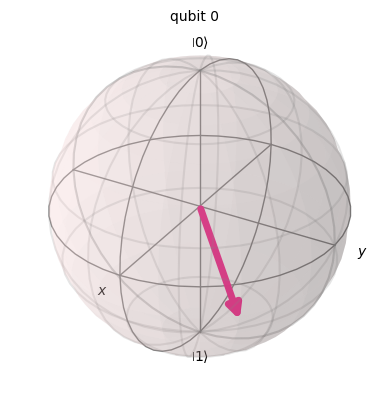

In [2]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex  

theta = 1.9
phi   = 0.8

psi_ket = np.array([np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]).reshape(2,1)
array_to_latex(psi_ket,prefix= '\ket{\psi} = ')

display(Statevector(psi_ket).draw('latex'))
display(Statevector(psi_ket).draw('Bloch'))

Las probabilidades de obtener '0' y '1' son los cuadrados de las amplitudes en valor absoluto

In [3]:
p0 = np.abs(psi_ket[0])**2
p1 = np.abs(psi_ket[1])**2

print('p(0)=', np.round(p0,5),', p(1)=', np.round(p1,5))

p(0)= [0.33836] , p(1)= [0.66164]


Vamos a recuperarlas *experimentalmente* corriendo un circuito. Primero obtenemos el diccionario de cuentas obtenidas después de ejecutar el circuito un número de veces

In [4]:
nshots = 10000

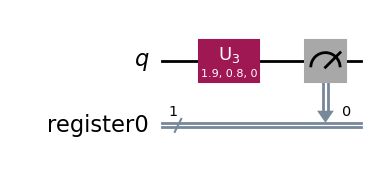

counts_psi =  Counter({'1': 66334, '0': 33666})


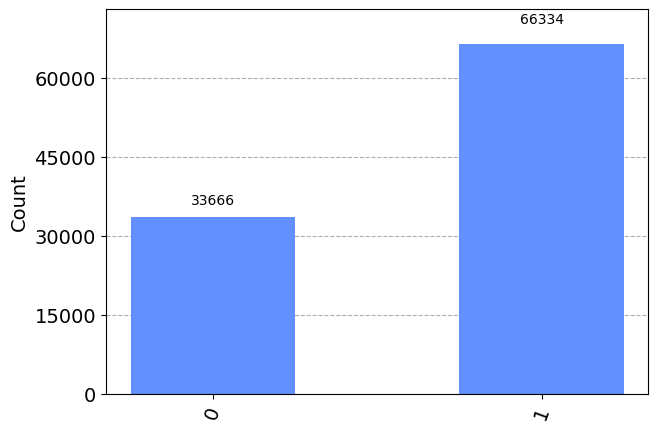

In [16]:
'''Qibo_code_cell'''
from qibo.models.circuit import Circuit, gates

'generamos un circuito en el que inicializamos el estado psi'
qc_psi_Qibo = Circuit(1)
qc_psi_Qibo.add(gates.U3(0, theta, phi, 0, trainable=True))
qc_psi_Qibo.add(gates.M(0))
display(tQ.draw_qibo_circuit_mpl(qc_psi_Qibo))
'ejecutamos un número de veces'
counts_psi = qc_psi_Qibo(nshots=nshots).frequencies()

'visualizamos los resultados como un diccionario y  mediante un histograma'
from qiskit.visualization import plot_histogram
print('counts_psi = ',counts_psi)
plot_histogram(counts_psi) # Mostramos un histograma de resultados

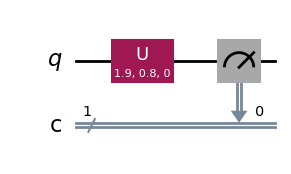

counts_psi =  {'1': 6593, '0': 3407}


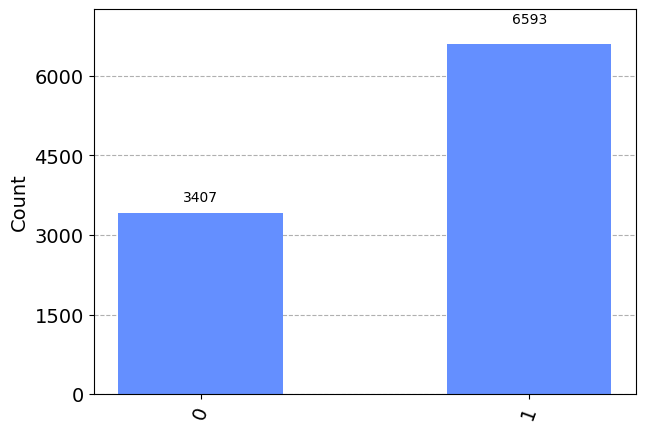

In [8]:
'''Qiskit_code_cell'''
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

'generamos un circuito en el que inicializamos el estado psi'
qc_psi_Qiskit = QuantumCircuit(1,1)
qc_psi_Qiskit.u(theta,phi,0,0)
qc_psi_Qiskit.measure(0,0)
display(qc_psi_Qiskit.draw('mpl'))

'ejecutamos un número de veces'
counts_psi = AerSimulator().run(qc_psi_Qiskit,shots=nshots).result().get_counts()

'visualizamos los resultados como un diccionario y  mediante un histograma'
from qiskit.visualization import plot_histogram
print('counts_psi = ',counts_psi)
plot_histogram(counts_psi) # Mostramos un histograma de resultados

Ahora podemos  calcular las frecuencias relativas $n_i/N$  y compararlas con las probabilidades $p(i)$

In [9]:
p0_experiment = counts_psi['0']/nshots
p1_experiment = counts_psi['1']/nshots

print('p(0)_experiment =', p0_experiment,'  p(1)_experiment = ',p1_experiment)

p(0)_experiment = 0.3407   p(1)_experiment =  0.6593


### Interferencia cuántica y medidas

El resultado de tirar una moneda al aire es una variable aleatoria binaria  equiprobable:  X = (cara,cruz). Es irrelevante si analizamos el resultado cada tirada o cada dos, o tres tiradas. Las frecuencias relativas de caras y cruces, siempre serán próximas a $1/2$.

Podemos imaginar un experimento similar con un cúbit, donde cara $\to \ket{0}$ y cruz $\to\ket{1}$ son los estados posibles de la medida en la base $Z$  

- tirar la moneda  clásica es ponerla en un estado incierto que puede acabar en cara o cruz al caer sobre la mesa (medir)

- tirar la moneda cuántica  es aplicar el operador $H$  para poner cualquiera de los dos resultados en una superposición 
$H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$ y $H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$ 

El resultado clásico y cuántico, para una sola tirada, coinciden en una distribución equiprobable

$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}= \ket{+} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = p(1) = 0.5
$$

La sorpresa está en observar el resultado ¡*después de dos tiradas*! Para  una moneda clásica, la distribución volvería a ser equiprobable.

$$
\ket{0}~ \stackrel{\rm tirar}{\longrightarrow} ~ H \ket{0}~ \stackrel{\rm tirar}{\longrightarrow} H^2\ket{0} = \ket{0} ~ \stackrel{\rm medir}{\longrightarrow} ~p(0) = 1 ~,~p(1) = 0
$$
 Cuánticamente observamos que se recupera el estado inicial, *cara*, ¡con un 100% de probabilidad!

 Es interesante ver este caso como ejemplo de *interferencia cuántica*, una herramienta que explotaremos intensivamente para fabricar algoritmos.
En efecto el proceso de hacer dos tiradas sucesivas (sin medir entre ellas) genera la siguiente sucesión estados

$$
\begin{array}{rcl}
\ket{0} &\stackrel{H}{\to}& \frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) \\ \rule{0mm}{8mm}
 &\stackrel{H}{\to}& \frac{1}{2}(\ket{0} + \ket{1}) + \frac{1}{2}(\ket{0} - \ket{1}) \\ \rule{0mm}{8mm}
 &=&  \frac{1}{2}(\ket{0} + \ket{0}) + \frac{1}{2}(\ket{1} - \ket{1})  \rule{0mm}{8mm}\\ \rule{0mm}{8mm}& =& \ket{0} 
\end{array}
$$

El resultado final es *cierto* y arrojará $0$ con 100% de probabilidad. Vemos que hay dos *caminos* posible para alcanzar cualquier resultado final, $\ket{0}$ ó $\ket{1}$. Los que intervienen para conseguir $\ket{0} \to \ket{0}$ contribuyen de manera *constructiva*, mientras que los dos caminos  $\ket{0}\to \ket{1}$ interfieren de forma *destructiva*. El signo menos en el segundo estado $\ket{1}$ es una amplitud de probabilidad negativa, algo imposible clásicamente.

<div class="alert alert-block alert-success">
<b>Ejercicio</b>: 
    
repite el razonamiento anterior

- comenzando con el estado <i>cruz</i>, es decir $\ket{1}$

- intercalando una medida entre ambas tiradas
</div>

El resultado del ejercicio anterior ilustra que la introducción de una medida intermedia *destruye la interferencia*.  La interferencia es una propiedad ligada a la coherencia cuántica, la cual se pierde través de la interacción del cúbit con el ambiente. Las medidas son interacciones de ese tipo. 

<div class="alert alert-block alert-success">
<b>Ejercicio</b>: 
construye un circuito y verifica los resultados que predice la mecánica cuántica. Estudia la introducción de más <i>tiradas</i> cuántica, $H^n$. Intercala una medida en distintas partes del circuito y mira qué resultado obtienes. 
</div>

## Medidas en bases generales

La elección del observable $Z$ para el medidor en la base computacional es arbitrario. Deberíamos ser capaces de modificar la base de medida a voluntad. Vamos a estudiar primero cómo usar las bases $X$ e $Y$ y después analizaremos el caso arbitrario. 

### Bases  X e Y

Los autovectores del operador $X$ se denominan convencionalmente $\ket{+}, \ket{-}$.
Desearíamos disponer de un circuito asociado a este observable, de forma que, a la detección de un autovector $\ket{+} $ registrase un  $0$ y de $\ket{-} $ un $1$.

Es fácil construir un circuito así, como se ve en la figura a continuación. Efectivamente la acción de $H\ket{+} = \ket{0}$
y $H\ket{-} = \ket{1}$ manda cada autoestado de $X$ a un autoestado de $Z$. A continuación un medidor estándar registrará el valor de $a =0,1$ según sea el estado medido. Una aplicación posterior de $H$ nos devolverá el estado original $H\ket{0} = H^2 \ket{+} = \ket{+}$ e igualmente $H\ket{1} = H^2 \ket{-} = \ket{-}$
<br>
<br>
<br>

<figure><center>
<img src="images/meter_xybasis.png" align=center width='700px'/>
</center></figure>

<br>
<br>

Igualmente denominemos $\ket{+ i}$ y   $\ket{- i}$ los autoestados del operador $Y$.
Podemos construir un circuito que registra $a = 0,1$ cuando el estado incidente colapsa a  $\ket{+ i}$ y   $\ket{- i}$ respectivamente.  Basta observar que $\ket{\pm i} = SH\ket{a}$. Inversamente $\ket{a} = HS^\dagger \ket{\pm i}$ y proceder igual que antes. 

En resumen: podemos *construir* aparatos de medida *efectivos* que actúan sobre las bases $X$ e $Y$ igual que el medidor estándar lo hace sobre $Z$

<figure><center>
<img src="images/meter_xybasis2.png" align=center width='700px'/>
</center></figure>
<br>

Detrás de estas equivalencias de circuitos, ahora con medidores, se esconde la conjugación de puertas siguiente

$$
X = H Z H
~~~~~~~~,~~~~~~~~~Y = SHZ HS^\dagger
$$

<div class="alert alert-block alert-danger",text-align:center>
<p style="text-align: left ;">  
<b>Nota</b>:
recuerda que el orden de la composición de operadores se invierte al plasmarlos en un circuito
</p>    
</div>

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
Comprueba  que estas ecuaciones de conjugación son correctas
</div>

### Formalismo general

Vamos a ver los dos casos anteriores como caso particulares de un aparato de medida asociado a una dirección arbitraria en la esfera de Bloch. Dado un vector unitario $~\hat\boldn~$

$$
\hat\bn(\theta,\phi) = \sin\theta\cos\phi \, \hat {\bf x} + \sin\theta\sin\phi \, \hat {\bf y} + \cos\theta \, \hat {\bf z}
$$

el observable asociado será  $ \hat{\boldn}\cdot \boldsymbol{\sigma}$  cuyos autoestados forman una  base $\{\ket{0}_{\hat{\bf n}}, \ket{1}_{\hat{\bf n}}\}$ con autovalores $\pm 1$

$$
\hat{\boldn}\cdot \boldsymbol{\sigma}\,\ket{0}_{\hat{\bf n}} = + \ket{0}_{\hat{\bf n}}~~~~~~,~~~~~~~
\hat{\boldn}\cdot \boldsymbol{\sigma}\,\ket{1}_{\hat{\bf n}} = - \ket{1}_{\hat{\bf n}}
$$


dados por 


$$
 \ket{0}_{\hat{\bf n}} = ~\begin{bmatrix} \cos\displaystyle\frac{\theta}{2} \\  ~e^{i\phi}\sin\displaystyle\frac{\theta}{2} \end{bmatrix} ~~~~~~~~~~~,~~~~~~~~~~~
 \ket{1}_{\hat{\bf n}} =  \begin{bmatrix} -e^{-i\phi}\sin\displaystyle\frac{\theta}{2} \\  \cos\displaystyle\frac{\theta}{2} \end{bmatrix} 
$$

Los casos particulares de la sección anterior se recuperan haciendo

$$
\begin{array}{ccl}
Z = \hat{\bf z} \cdot \boldsymbol{\sigma} ~~&\rightarrow& ~~\{\ket{0},\ket{1} \} = \{\ket{0}_{\hat{\bf z}},\ket{1}_{\hat{\bf z}}\}\\ \rule{0mm}{8mm}
X = \hat{\bf x} \cdot \boldsymbol{\sigma} ~~&\rightarrow&  \{\ket{+},\ket{-}\}  = \{\ket{0}_{\hat{\bf x}},\ket{1}_{\hat{\bf x}}\} \\ \rule{0mm}{8mm}
Y = \hat{\bf y} \cdot \boldsymbol{\sigma} ~~&\rightarrow&  \{\ket{+i},\ket{-i}\}  = \{\ket{0}_{\hat{\bf y}},\ket{1}_{\hat{\bf y}}\}
\end{array}
$$





Usando operadores de rotación podemos convertir el medidor estándar asociado a $Z$ con un medidor efectivo asociado al observable general $\hat {\bf n} \cdot \bsig$. Veamos cómo:

- sea $~\hat{\bf z}\cdot\bsig ~$ el <u>*aparato de medida estandar*</u> orientado a lo largo del eje $~\hat{\bf z}$

$$
 \hat{\bf z}\cdot \bsig \,  \ket{a}_{\hat{\bf z}} = (-1)^a\ket{a}_{\hat{\bf z}} = Z \ket{a} 
$$

- y  $~\hat\bn\cdot \bsig~$ el <u>aparato de medida orientado</u> a lo largo del eje $\hat\bn$


$$
\hat\bn\cdot \bsig \,  \ket{a}_{\hat{\bf n}} = (-1)^a\ket{a}_{\hat{\bf n}}
$$

las bases de autovectores asociadas $\{\ket{a}_{\hat{\bf z}}\}$ y  $\{\ket{a}_{\hat{\bf n}}\}$ ser  relacionan mediante una simple *rotación* unitaria

$$
\ket{0}_{\hat\boldn} = U \ket{0}_{\hat{\bf z}}~~~~~~,~~~~~~
\ket{1}_{\hat\boldn} = U \ket{1}_{\hat{\bf z}}
$$


<figure><center> 
<img src="images/BlochSphere_basis.png" align=center width='300px'/>
</center></figure>

El operador en cuestión es 

$$
U(\hat {\bf z}\to \hat \bn) = U(\theta,\phi,0)=\begin{bmatrix}   \cos \displaystyle\frac{\theta}{2}  & -  \sin\displaystyle\frac{\theta}{2}  \\ 
\rule{0mm}{4mm} e^{i\phi} \sin \displaystyle\frac{\theta}{2} &e^{i\phi} \cos \displaystyle\frac{\theta}{2} \end{bmatrix}
$$

como es fácil de comprobar

$$ 
\begin{bmatrix} \cos\theta \\ e^{i\phi}\sin\theta \end{bmatrix} = U\cdot \begin{bmatrix}1\\0 \end{bmatrix} ~~~~~~~,~~~~~~~
\begin{bmatrix} -\sin\theta \\ e^{i\phi}\cos\theta \end{bmatrix} = U\cdot \begin{bmatrix}0\\1 \end{bmatrix}  
$$

Si las componentes de los vectores rotan en la forma $\ket{a}_{\hat{\bf n}} = U\ket{a}_{\hat{\bf z}}$
los observables asociados  se relacionan algebraicamente *como lo hace cualquier operador*

$$
\hat {\bf n} \cdot\bsig =  U \, (\hat {\bf z} \cdot \bsig)\,  U^\dagger 
$$

<details><summary><p> >> <i>Verificamos la consistencia</i>  </p></summary>
\begin{eqnarray}
\hat {\bf n} \cdot \bsig\,  \ket{a}_{\hat{\bf n}} ~~&=&~~ 
U~ \hat {\bf z} \cdot \bsig ~  U^\dagger ~ U  \ket{a}_{\hat{\bf z}}\\  \rule{0mm}{8mm}
&=& U~ \hat {\bf z} \cdot \bsig ~   \ket{a}_{\hat{\bf z}}\\   \rule{0mm}{8mm}
&=& U\, Z \ket{a} = U (-1)^a \ket{a}_{\hat{\bf z}} \\  \rule{0mm}{8mm}
&=&  (-1)^a U\ket{a}_{\hat{\bf z}} \\  \rule{0mm}{8mm}
&=& (-1)^a \ket{a}_{\hat{\bf n}}  \rule{0mm}{8mm}
\end{eqnarray}
</details>


<div class="alert alert-block alert-success",text-align:center>
<p style="text-align: left ;">  
<b>Ejercicio</b>: 
comprueba operando la ecuación anterior
</p>    
</div>

El circuito siguiente  *simula* un aparato de medición en la base $\{\ket{a}_{\hat{\bf n}}\}$
obtenido mediante la rotación del aparato de medida en la base $\{\ket{a}_{\hat{\bf n}}\}$ de autoestados de $Z$ 


<figure><center>   
<img src="images/nbasis_measure2.png" align=center width='500px'/>
</center></figure>

Notar que 

- los casos particulares  de bases $X$ e $Y$ se recuperan con $U = H$ en el primer caso y $U = SH$ en el segundo. 

- si el estado se destruye en la medida o  no es conservado posteriormente, podemos simplificar el circuito de medida para que sólo informe del valor medido

<figure><center>   
<img src="images/Un_meter_simple.png" align=center width='400px'/>
</center></figure>


## Valores esperados de un observable

Conociento la probabilidades de aparición de los posible autovalores $\lambda_i$ de un operador $A$ tenemos acceso al valor esperado

$$
\langle A \rangle_\psi = \bra{\psi}A\ket{\psi} = \sum_i p(\lambda_i) \lambda_i
$$

Como sólo disponemos de un observable, el medidor estándar en la dirección $Z$, tendremos que ser creativos para poder obtener este valor esperado. La clave está en que sólo necesitaremos los medidores efectivos en las bases $X, Y $ y $Z$. 

### Descomposición en la base de Pauli

La clave reside en observar que  <i>cualquier observable</i> sobre un cúbit $A = A^\dagger$ puede desarrollarse en la base $\sigma_i = \{I,X,Y,Z\}, \, i=0,1,2,3$

$$
A = a_0 I + a_1 X + a_2 Y  + a_3 Z \, . 
$$

con coeficientes 

$$
a_i = \frac{1}{2} \tr \, (A \sigma_i)\, .
$$

Esta expresión se obtiene haciendo uso de la relación $\to \frac{1}{2} \tr\,  (\sigma_i \sigma_j) = \delta_{ij}$.
<br>
<br>
    
<details><summary><p  > >> <i>Comprobación</i> </p></summary>
$$
\frac{1}{2} \tr \, (A \sigma_i) = \frac{1}{2} \tr \, \left((\sum_{j=0}^3 a_j \sigma_j) \sigma_i\right)
= \sum_{j=0}^3 a_j \, \frac{1}{2} \tr ( \sigma_j \sigma_i) = \sum_{j=0}^3 a_j \delta_{ji} = a_i
$$
    
</details>


Entonces, podremos obtener el valor esperado de $A$  si somos capaces de medir los de $X,$ $Y$ y $Z$.

\begin{eqnarray*}
\langle A\rangle_\psi ~=~\bra{\psi}A\ket{\psi} ~&=& ~ 
\bra{\psi} a_0 I + a_1 X + a_2 Y  + a_3 Z \ket{\psi} \\ \rule{0mm}{8mm}
&=& ~a_0 + a_1 \langle X\rangle_\psi + a_2 \langle Y\rangle_\psi + a_3 \langle Z\rangle_\psi
\end{eqnarray*}


- $\langle Z \rangle_{\psi}$

Los estados de la base computacional son autoestados del operador $Z$ con autovalor $\pm 1$
<br>

$$
Z \ket{0} =+ \ket{0}   ~~~~~~~~~~~~~~~~~~~~~ Z \ket{1} =-\ket{1} 
$$
<br>

Dado un estado $\ket{\psi} = c^Z_0\ket{0} + c^Z_1\ket{1}$, la medida repetida arroja de forma aleatoria los valores propios de $Z \to \pm 1$ con frecuencias relativas 
<br>
<br>
$$(+1)\to n^Z_0 ~~~~~~~~~~~~~~~~~~~~~~~~ (-1)\to n^Z_1$$ 

El valor medio de dicha variable es, 

\begin{eqnarray*}
\langle Z \rangle_\psi = \bra{\psi} Z \ket{\psi} 
&=& \left( c^Z_0\bra{0} + c^Z_1\bra{1}\right) Z\left( c^Z_0\ket{0} + c^Z_1\ket{1}\right)  \nonumber \\  \rule{0mm}{10mm}
&=& (+1) |c^Z_0|^2 + (-1) |c^Z_1|^2    \nonumber \\  \rule{0mm}{10mm}
&=& +\frac{n^Z_0}{N}- \frac{ n^Z_1}{N}
\end{eqnarray*}


Para medir autovalores de $\langle Z\rangle_\psi$ el circuito es el más simple
<br>
<br>


<figure><center>
<img src="images/cubit_meter1.png" align=center width='300px'/>
</center></figure>

- $\langle X \rangle_{\psi}$

En la base $X$, **el mismo estado** de entrada se escribirá con otras componentes $\ket{\psi} = c_0^X\ket{+} + c_1^X\ket{-}$.

Si ahora medimos $\ket{\psi}$ en la base $X$, la repetición arrojará  una muestra aleatoria de autovalores de $X\to \pm 1$ con frecuencias 

$$~(+1)\to n^X_0  ~~~~~~~~~~~~~~~~~~~ (-1)\to n^X_1  $$

El valor esperado de $X$  se obtiene del promedio de frecuencias *relativas*

$$
\langle X \rangle_\psi ~= (+1)|c_0^X|^2 +(-1)|c_1^X|^2 ~=~ +\frac{n^X_0}{N}- \frac{ n^X_1}{N}
$$



Ya hemos visto cuál es el circuito necesario para  medir en la base $X$ 
<br>
<br>

<figure><center>
<img src="images/cubit_meter_xbasis.png" align=center width='400px'/>
</center></figure>

- $\langle Y \rangle_{\psi}$


Igualmente, si medimos el estado $\ket{\psi} = c_0^Y\ket{+i} + c_1^Y\ket{-i}$ con un medidor asociado al operador $Y = SHZHS^\dagger$, la repetición arrojará  una muestra aleatoria de valores propios de $Y\to \pm 1$ con frecuencias relativas $+1\to n^Y_0$ y $-1\to n^Y_1$. Entonces

$$
\langle Y \rangle_\psi = +\frac{n^Y_0}{N}- \frac{ n^Y_1}{N}\, .
$$



Circuito necesario para medir en la base $ Y$ 
<br>

<figure><center>
<img src="images/cubit_meter_ybasis.png" align=center width='400px'/>
</center></figure>

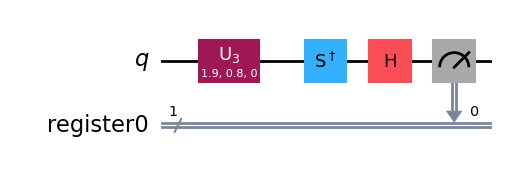

Counter({'0': 8357, '1': 1643})
< Y > = 0.6714


In [31]:
'''Qibo_code_cell'''
from qibo.models.circuit import Circuit, gates

qc_psi_Qibo = Circuit(1)
qc_psi_Qibo.add(gates.U3(0, theta, phi, 0, trainable=True))

'añadimos el medidor efectivo segun queramos medir sea <X>, <Y> o <Z>'
P = 'Y'

if P =='X':
    qc_psi_Qibo.add(gates.h(0))    

elif P =='Y':
    qc_psi_Qibo.add(gates.SDG(0))    
    qc_psi_Qibo.add(gates.H(0))    

qc_psi_Qibo.add(gates.M(0))
display(tQ.draw_qibo_circuit_mpl(qc_psi_Qibo))

'ejecutamos'
nshots = 10000
counts_psi = qc_psi_Qibo(nshots=nshots).frequencies()
print(counts_psi)

'Ahora,con las frecuencias relativas de los autovalores  de Z, podemos calcular los valores medios'
mean_P = 0
for bits, counts  in counts_psi.items():
    mean_P += (-1)**(int(bits))* (counts/nshots)

print('<',P,'>','=',np.round(mean_P,5))

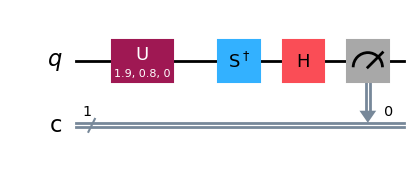

{'1': 15924, '0': 84076}
< Y > = 0.68152


In [33]:
'''Qiskit_code_cell'''

qc_psi_Qiskit = QuantumCircuit(1,1)
qc_psi_Qiskit.u(theta,phi,0,0)

'añadimos el medidor efectivo segun queramos medir sea <X>, <Y> o <Z>'
P = 'Y'

if P =='X':
    qc_psi_Qiskit.h(0)    

elif P =='Y':
    qc_psi_Qiskit.sdg(0)
    qc_psi_Qiskit.h(0)

qc_psi_Qiskit.measure(0,0)    
display(qc_psi_Qiskit.draw('mpl')) 

nshots = 100000
from qiskit_aer import AerSimulator

counts_psi = AerSimulator().run(qc_psi_Qiskit,shots = nshots).result().get_counts()
print(counts_psi)


'Ahora,con las frecuencias relativas de los autovalores  de Z, podemos calcular los valores medios'
mean_P = 0
for bits, counts  in counts_psi.items():
    mean_P += (-1)**(int(bits))* (counts/nshots)

print('<',P,'>','=',np.round(mean_P,5))

Finalmente ya estamos en condiciones de calcular el valor esperado de un observable arbitrario

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
<br>    
genera un observable arbitrario $A$. Obtén los coeficientes $a_i$  y calcula el valor esperado 
    
\begin{eqnarray*}
\langle A\rangle_\psi  = ~a_0 + a_1 \langle X\rangle_\psi + a_2 \langle Y\rangle_\psi + a_3 \langle Z\rangle_\psi
\end{eqnarray*}
</div>

**$\langle A \rangle$ con un sólo circuito**

Podemos escribir la descomposición de $A$ de la siguiente manera

$$
A = a_0 I + |{\bf a}| ~ \hat \bn \cdot \bsig 
$$

donde ${\bf a} = (a_1,a_2,a_3)~$ y $~\hat \bn = {\bf a}/ |{\bf a}|$.
De modo que, ahora 

$$
\langle A \rangle_\psi  = a_0 + |\bf a| \,  \langle \bn \cdot \bsig  \rangle_\psi
$$

Vemos que para calcular $\langle A \rangle_\psi$ es suficiente con conocer los valores $a_i = (a_0,{\bf a})$ y **un sólo circuito** que nos proporcione el valor esperado $\langle \bn \cdot \bsig  \rangle_\psi$. 

La clave de este último punto está en usar el *medidor efectivo* en la dirección $\hat \bn$ 

<br>



<figure><center>
<img src="images/Un_meter.png" align=center width='400px'/>
</center></figure>


Con la salida de este circuito, el valor esperado es análogo

$$
\langle \bn \cdot \bsig  \rangle_\psi =  + \frac{n_0}{N} - \frac{n_1}{N}
$$

<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
<br> utiliza éste metodo para obtener el mismo valor $\langle A\rangle_\psi $ que en el ejercicio anterior
</div>

### Valor esperado de un operador unitario

En general el estado $\ket{\psi}$ debe prepararse a partir del estado $\ket{0}$. No siempre $U$ es conocido, pero vamos a suponer que es el caso

$$\ket{\psi} = U_\psi\ket{0}$$

En este caso, podemos calcular el valor esperado de cualquier operador unitario $V$ de la siguiente forma

$$
\bra{\psi}V\ket{\psi} = \bra{0} U_\psi^\dagger V U_\psi\ket{0} = \braket{0}{\tilde \psi}
$$

donde hemos definido el nuevo estado
$$\ket{\tilde\psi} \equiv U_\psi^\dagger V U_\psi\ket{0}$$ 

que se prepara  mediante un circuito sencillo:



<figure><center>
<img src="images/vev_unitary_V.png" align=center width='400px'/>
</center></figure>
</p>

 Midiendo $\ket{\tilde \psi}$  en la base $Z$, la fracción relativa de resultados $0\to  n_0/N$ nos da acceso al *módulo del valor esperado* de $V$. 
 
$$
\sqrt{ \frac{n_{0}(\tilde\psi)}{N} } ~=~  \sqrt{p_0}  ~=~   | \braket{0}{\tilde \psi}|  ~=~ |\bra{\psi}V\ket{\psi}|  ~=~ |\langle V\rangle|_\psi   
$$


**Observable unitario**

Si $V$ además de ser <i>unitario</i>, fuese <i>hermítico</i>, entonces $ \pm \langle V \rangle$ sería una cantidad real. Por este método, al obtener $|\langle V\rangle |$  sólo perderíamos el signo.


Operadores de 1 cúbit unitarios y hermíticos son, por ejemplo, los operadores 
$V = X,Y,Z,H$. 
Este argumento nos permite calcular de otra manera 

$$
\left. 
\begin{array}{c}| \langle Z\rangle_\psi | \\ \rule{0mm}{8mm} | \langle X\rangle_\psi | \\ \rule{0mm}{8mm} | \langle Y\rangle_\psi | \end{array}
\right\} ~=~|\braket{0}{\tilde\psi}| ~=~ \sqrt{\frac{n_{0}(\tilde\psi)}{N}} ~~~~~\hbox{con}~~~~~~
\left\{ 
\begin{array}{l}  \ket{\tilde \psi} = U^\dagger  Z  U\ket{0} \\ \rule{0mm}{8mm} \ket{\tilde \psi} = U^\dagger X U\ket{0}  \\ \rule{0mm}{8mm}  \ket{\tilde \psi} = U^\dagger Y U\ket{0} \end{array}
\right.
$$


<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
Calcula por este procedimiento los valores de  $\langle X\rangle_\psi$, $\langle Y\rangle_\psi$ y $\langle Z\rangle_\psi$ encontrados anteriormente y verifica que obtienes el mismo resultado. 
</div>

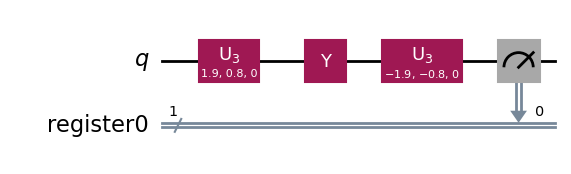

Counter({'1': 8636, '0': 1364})
|< Y >| = 0.36805


In [43]:
'''Qibo_code_cell'''
from qibo.models.circuit import Circuit, gates

qc_psi_Qibo = Circuit(1)
qc_psi_Qibo.add(gates.U3(0, theta, phi, 0, trainable=True))

'fijemos el observable a medir'
P = 'Y'

if P =='X':
    qc_psi_Qibo.add(gates.X(0))
elif P=='Y':
    qc_psi_Qibo.add(gates.Y(0))
elif P=='Z':
    qc_psi_Qibo.add(gates.Z(0))

qc_psi_Qibo.add(gates.U3(0, -theta, -phi, 0, trainable=True))

qc_psi_Qibo.add(gates.M(0))
display(tQ.draw_qibo_circuit_mpl(qc_psi_Qibo))

'ejecutamos'
nshots = 10000
counts_psi = qc_psi_Qibo(nshots=nshots).frequencies()
print(counts_psi)

' ahora solo nos interesa la fracción de 0s '
mean_P = np.sqrt(counts['0']/shots)
print('|<',P,'>| =',np.round(mean_P,5))


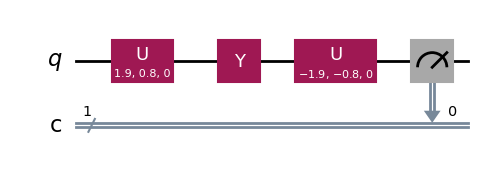

|< Y >| = 0.36805


In [42]:
'''Qiskit_code_cell'''

' el operador unitario que lo genera a partir de |0> es U(theta, phi, 0,0)'
qc_psi_U = QuantumCircuit(1,1)
qc_psi_U.u(theta,phi,0,0)


'fijemos el observable a medir'
P = 'Y'

if P =='X':
    qc_psi_U.x(0)
elif P=='Y':
    qc_psi_U.y(0)
elif P=='Z':
    qc_psi_U.z(0)
    
qc_psi_U.u(-theta,-phi,0,0)


qc_psi_U.measure(0,0)

display(qc_psi_U.draw('mpl'))

' ejecutamos '
shots= 100000
counts=AerSimulator().run(qc_psi_U,shots=shots).result().get_counts()

' ahora solo nos interesa la fracción de 0s '
mean_P = np.sqrt(counts['0']/shots)
print('|<',P,'>| =',np.round(mean_P,5))


<div class="alert alert-block alert-success">
<b>Ejercicio:</b> 
<br>
$X,Y,Z$ y $H$ son caso particulares de $\hat\bn\cdot\bsig$ que es también unitario. Escribe el circuito que calcularía $\langle \hat\bn\cdot\bsig\rangle$ y verifica que da el mismo resultado que obtuviste en un ejercicio anterior.
</div>